<a href="https://colab.research.google.com/github/parikshithsivakumar/NeuralNetworkandDeepLearning/blob/main/NNDL2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

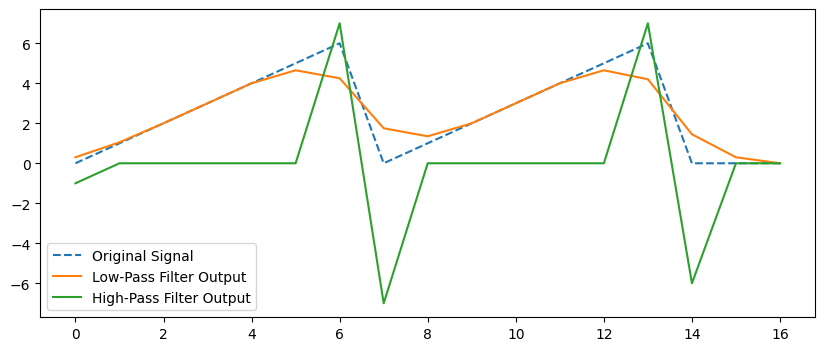

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define Signal X and Filters H_L and H_H
X = [0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 0, 0]
H_L = [0.05, 0.2, 0.5, 0.2, 0.05]  # Low-pass filter
H_H = [-1, 2, -1]  # High-pass filter

# Convolution
y_low = np.convolve(X, H_L, mode='same')
y_high = np.convolve(X, H_H, mode='same')

# Plot Results
plt.figure(figsize=(10, 4))
plt.plot(X, label="Original Signal", linestyle='dashed')
plt.plot(y_low, label="Low-Pass Filter Output")
plt.plot(y_high, label="High-Pass Filter Output")
plt.legend()
plt.show()


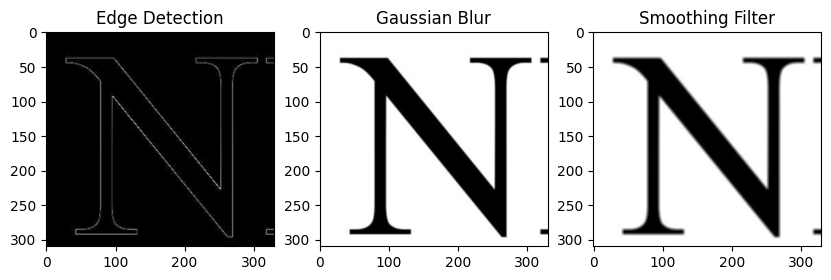

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from skimage.io import imread
from skimage.color import rgb2gray

# Load and Convert Image
im = imread("Neural.JPG")  # Adjust path accordingly
img = rgb2gray(im) * 255
img1 = img[40:350, 20:350]  # Cropping region of interest

# Define Filters
fil1 = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])  # Edge detection
fil2 = np.array([[0.2, 0.5, 0.2], [0.5, 1, 0.5], [0.2, 0.5, 0.2]])  # Gaussian blur
fil3 = np.full((5, 5), 0.1)  # Smoothing filter

# Convolution
grad1 = signal.convolve2d(img1, fil1, boundary='symm', mode='same')
grad2 = signal.convolve2d(img1, fil2, boundary='symm', mode='same')
grad3 = signal.convolve2d(img1, fil3, boundary='symm', mode='same')

# Plot Results
plt.figure(figsize=(10, 3))
plt.subplot(1, 3, 1)
plt.imshow(abs(grad1), cmap='gray')
plt.title("Edge Detection")

plt.subplot(1, 3, 2)
plt.imshow(grad2, cmap='gray')
plt.title("Gaussian Blur")

plt.subplot(1, 3, 3)
plt.imshow(grad3, cmap='gray')
plt.title("Smoothing Filter")
plt.show()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.4582 - loss: 0.7298 - val_accuracy: 0.4563 - val_loss: 0.7207
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5522 - loss: 0.6884 - val_accuracy: 0.4437 - val_loss: 0.7212
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5593 - loss: 0.6847 - val_accuracy: 0.4250 - val_loss: 0.7209
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6011 - loss: 0.6749 - val_accuracy: 0.4250 - val_loss: 0.7211
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6069 - loss: 0.6669 - val_accuracy: 0.4250 - val_loss: 0.7258
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6218 - loss: 0.6595 - val_accuracy: 0.4750 - val_loss: 0.7262
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6597 - loss: 0.6422 - val_accuracy: 0.4625 - val_loss: 0.7348
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6868 - loss: 0.6294 - val_accuracy: 0.4688 - val_loss:

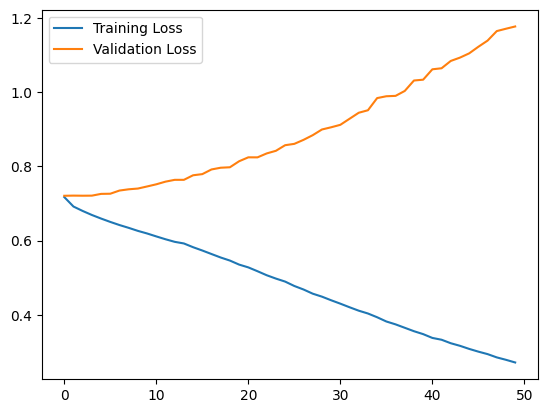

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5273 - loss: 1.0796  
Test Accuracy: 0.51


In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Dummy dataset (replace with actual dataset)
X = np.random.rand(1000, 20)  # 1000 samples, 20 features
y = np.random.randint(0, 2, 1000)  # Binary classification

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define MLP model
model = keras.Sequential([
    layers.Dense(32, activation="relu", input_shape=(X_train.shape[1],)),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Train model
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2, batch_size=16, verbose=1)

# Plot Training and Validation Loss
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.show()

# Test Model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}")
